In [1]:
from keras.layers import Input, Dense,Dropout, Flatten,Lambda
from keras.models import Model,Sequential
from sklearn.model_selection import train_test_split as tts
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.utils import np_utils,plot_model
from keras.layers.convolutional import Convolution2D,MaxPooling2D,Conv2D
from keras import backend as K
from keras.losses import categorical_hinge,categorical_crossentropy
import tensorflow as tf
#from tensorflow.layers import flatten,batch_normialization as batch_norm

Using TensorFlow backend.
/home/slcf/.pyenv/versions/3.6.2/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## load data

In [2]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [4]:
print(x_train.shape)

(50000, 32, 32, 3)


In [5]:
Xtr,Xval,Ytr,Yval = tts(x_train,Y_train,test_size = 0.3)

## import defined modules

In [6]:
import sys
sys.path.append('../')
from cifar_clf import *
from cifar_tfdae import *


In [38]:
cifar_cnn = Cifar10_CNN(x_train,Y_train,num_batch=128,num_epoch=50)

In [39]:
print(Xtr.shape)

(35000, 32, 32, 3)


In [40]:
#len(cifar_cnn.batch_gen.get_batch())

### train classifer

In [41]:
#cifar_cnn.train("cifar_CNN_clf.ckpt")
cifar_cnn.restore("cifar_CNN_clf.ckpt")

[0/5850] Loss: 2.293516 Train_Acc: 0.1172 Val_Acc: 0.0703
[500/5850] Loss: 0.958169 Train_Acc: 0.7188 Val_Acc: 0.5469
[1000/5850] Loss: 0.442042 Train_Acc: 0.8906 Val_Acc: 0.6094
[1500/5850] Loss: 0.273378 Train_Acc: 0.9609 Val_Acc: 0.6406
[2000/5850] Loss: 0.137227 Train_Acc: 0.9844 Val_Acc: 0.5938
[2500/5850] Loss: 0.098813 Train_Acc: 1.0000 Val_Acc: 0.6797
[3000/5850] Loss: 0.175186 Train_Acc: 0.9688 Val_Acc: 0.6172
[3500/5850] Loss: 0.156554 Train_Acc: 0.9922 Val_Acc: 0.7188
[4000/5850] Loss: 0.040091 Train_Acc: 1.0000 Val_Acc: 0.6953
[4500/5850] Loss: 0.006920 Train_Acc: 1.0000 Val_Acc: 0.6406
[5000/5850] Loss: 0.035340 Train_Acc: 1.0000 Val_Acc: 0.6328
[5500/5850] Loss: 0.091051 Train_Acc: 1.0000 Val_Acc: 0.6641
saved path:  ../logs/cifar_CNN_clf.ckpt


In [42]:
cifar_cnn.accuracy_score(x_test,Y_test)

0.63531650641025639

# PGD targeted attacks

In [12]:
cifar_cnn.targeted_attack(x_test,Y_test,file_name = 'cifar10_adv')

[0/10000] processed
[100/10000] processed
[200/10000] processed
[300/10000] processed
[400/10000] processed
[500/10000] processed
[600/10000] processed
[700/10000] processed
[800/10000] processed
[900/10000] processed
[1000/10000] processed
[1100/10000] processed
[1200/10000] processed
[1300/10000] processed
[1400/10000] processed
[1500/10000] processed
[1600/10000] processed
[1700/10000] processed
[1800/10000] processed
[1900/10000] processed
[2000/10000] processed
[2100/10000] processed
[2200/10000] processed
[2300/10000] processed
[2400/10000] processed
[2500/10000] processed
[2600/10000] processed
[2700/10000] processed
[2800/10000] processed
[2900/10000] processed
[3000/10000] processed
[3100/10000] processed
[3200/10000] processed
[3300/10000] processed
[3400/10000] processed
[3500/10000] processed
[3600/10000] processed
[3700/10000] processed
[3800/10000] processed
[3900/10000] processed
[4000/10000] processed
[4100/10000] processed
[4200/10000] processed
[4300/10000] processed


# Train DAE 

In [12]:
#cifar_dae = Cifar_DAE(x_train,Y_train,noise_scale = 0.1,dae_type = "over",filter_nums = [32,64],
#                      loss_type = "binary_crossentropy",epoch = 10) 
# default is mse nosise!
cifar_dae = Cifar10_DAE(x_train,Y_train,num_epoch=30,loss_type = "mse",num_batch=256)

[0/4080] (Loss) Train_n: 0.227255 Train_cln: 0.226739 Val_n: 0.227128 Val_cln: 0.226612


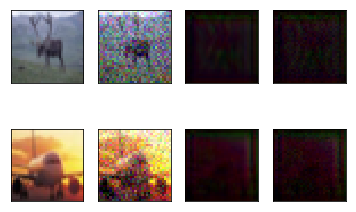

[500/4080] (Loss) Train_n: 0.155934 Train_cln: 0.154732 Val_n: 0.155728 Val_cln: 0.154542


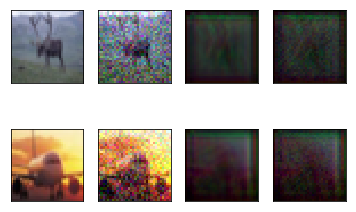

[1000/4080] (Loss) Train_n: 0.044992 Train_cln: 0.044141 Val_n: 0.044768 Val_cln: 0.043931


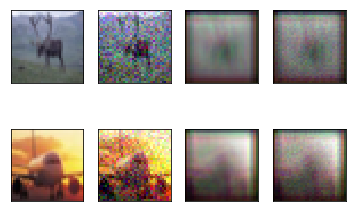

[1500/4080] (Loss) Train_n: 0.039752 Train_cln: 0.038916 Val_n: 0.039562 Val_cln: 0.038739


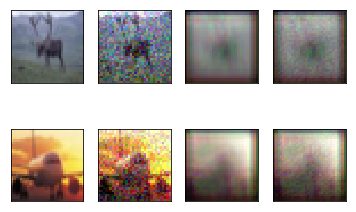

[2000/4080] (Loss) Train_n: 0.034983 Train_cln: 0.033995 Val_n: 0.034817 Val_cln: 0.033840


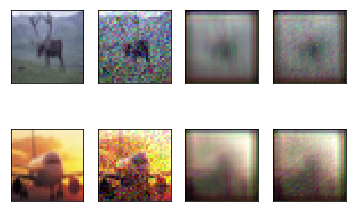

[2500/4080] (Loss) Train_n: 0.030664 Train_cln: 0.029577 Val_n: 0.030517 Val_cln: 0.029441


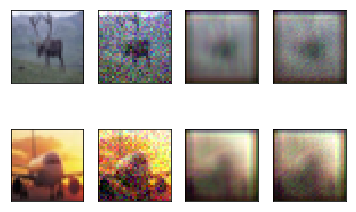

[3000/4080] (Loss) Train_n: 0.026914 Train_cln: 0.025777 Val_n: 0.026780 Val_cln: 0.025657


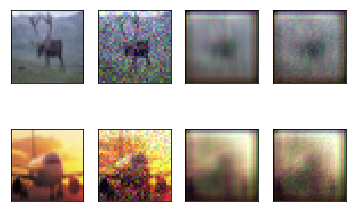

[3500/4080] (Loss) Train_n: 0.023683 Train_cln: 0.022539 Val_n: 0.023567 Val_cln: 0.022432


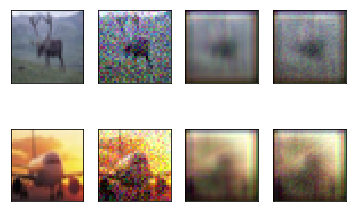

[4000/4080] (Loss) Train_n: 0.020946 Train_cln: 0.019810 Val_n: 0.020840 Val_cln: 0.019714


In [ ]:
cifar_dae.train('../logs/cifar10_tfdae.ckpt',num_viz = 2)

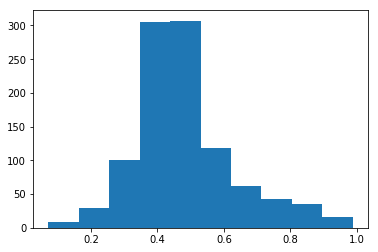

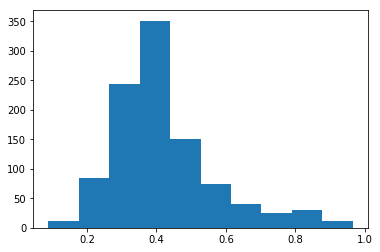

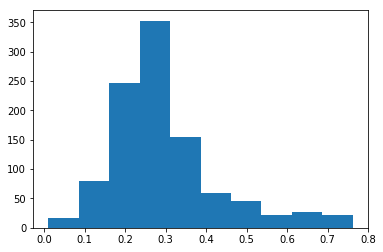

In [9]:
recon = cifar_dae.predict(x_train[:1])
plt.figure()
plt.hist(recon[0,:,:,0].flatten())
plt.show()
plt.figure()
plt.hist(recon[0,:,:,1].flatten())
plt.show()
plt.figure()
plt.hist(recon[0,:,:,2].flatten())
plt.show()

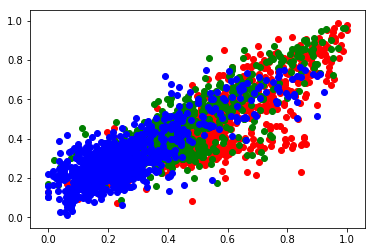

In [10]:
plt.figure()
plt.scatter(x_train[0,:,:,0].flatten(),recon[0,:,:,0].flatten(),color='r')
plt.scatter(x_train[0,:,:,1].flatten(),recon[0,:,:,1].flatten(),color='g')
plt.scatter(x_train[0,:,:,2].flatten(),recon[0,:,:,2].flatten(),color='b')
plt.plot()
plt.show()

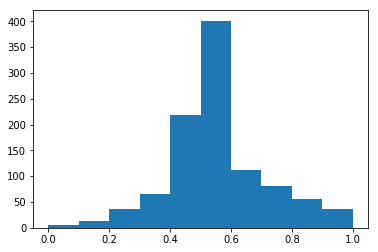

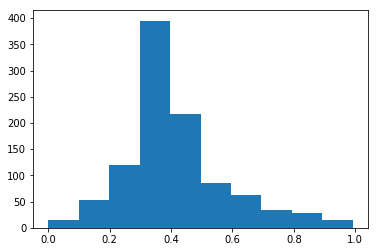

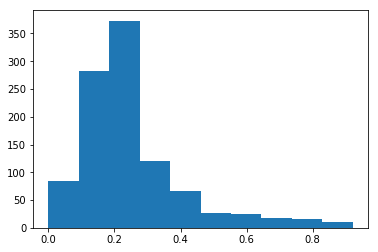

In [11]:
plt.figure()
plt.hist(x_train[0,:,:,0].flatten())
plt.show()
plt.figure()
plt.hist(x_train[0,:,:,1].flatten())
plt.show()
plt.figure()
plt.hist(x_train[0,:,:,2].flatten())
plt.show()

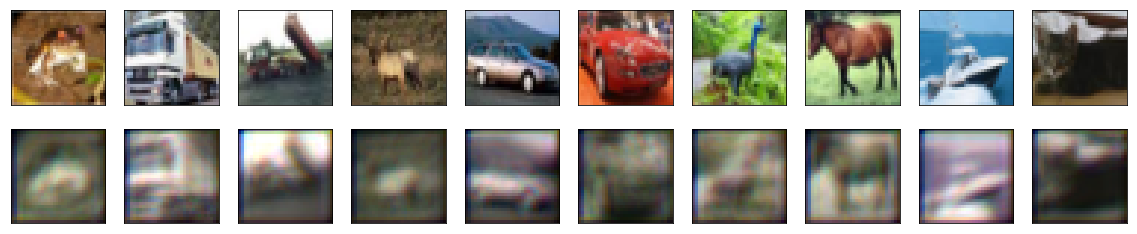

In [12]:
cifar_dae.plot_imgs(x_train[:20],noise_type = 'gaussian',noise_scale = 0.0)

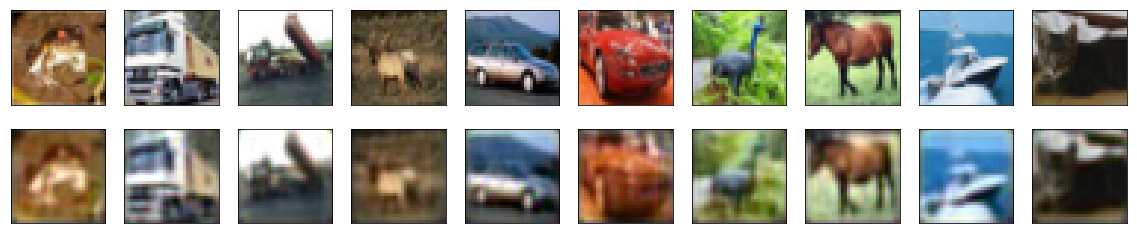

In [16]:
cifar_dae.plot_imgs(x_train[:20],noise_type = 'gaussian',noise_scale = 0.0)

In [13]:
_,x_noisy = corrupt(x_test,scale = 0.1, noise_type = "peppSalt")
cifar_cnn.accuracy_score(x_noisy,Y_test)

NameError: name 'cifar_cnn' is not defined

In [52]:
x_dae = cifar_dae.autoencoder.predict(x_noisy)


In [56]:
print(cifar_cnn.accuracy_score(x_dae,Y_test))
x_dae_c = cifar_dae.autoencoder.predict(x_test)
print(cifar_cnn.accuracy_score(x_dae_c,Y_test))

0.547676282051
0.58343349359


In [54]:
x_ds = cifar_dae.apply_DS(x_noisy)

In [57]:
print(cifar_cnn.accuracy_score(x_ds,Y_test))

0.463741987179


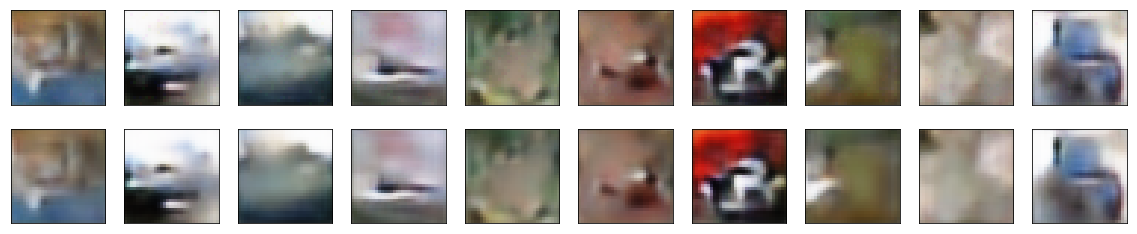

In [58]:
cifar_dae.plot_imgs(x_ds,noise_type = 'peppSalt',noise_scale = 0.0)